In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Preprocessing Data

In [2]:
data_root = '../data/'
seed = 27

df = TabularDataset(data_root + 'train_dataset.csv')
df = df.reset_index(drop=True)
# psuedo = TabularDataset(data_root + 'public_dataset_without_gt_latlon.csv')
# psuedo = pd.read_csv(data_root + 'public_dataset_without_gt_latlon.csv')
# psuedo_y = TabularDataset('top1.csv')
# psuedo = pd.concat([psuedo, psuedo_y], axis = 1)
df

,ID,pms_i_ymd,Area,Province,Shop Name,gender,date_of_birth_week,date_of_birth,marital_status,number_of_children,...,Mortgage_balance,Credit Card_balance,Automobile installment purchase_balance,Other installment purchase_balance,Loan for agriculture_balance,Other Loans_balance,Bank inquiry_count,Consumer finance inquiry_count,Leasing enquiry_count,default_12month
0,202412000001,2018/4/2,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,6,1971/5/18,1,2,...,0.0,0.0,0.0,0.0,30000.0,0.0,12,6,0,0
1,202412000002,2018/4/2,Bangkok Metropolitan Region,Bangkok,Silom Complex,M,4,1983/1/5,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,202412000003,2018/4/3,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,5,1992/11/19,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0,0
3,202412000004,2018/4/4,Bangkok Metropolitan Region,Bangkok,Silom Complex,M,7,1990/11/3,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,202412000005,2018/4/4,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,6,1994/12/16,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32519,202412049586,2018/8/31,webpak,webpak,webpak,F2,3,1995/10/24,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
32520,202412049587,2018/8/31,webpak,webpak,webpak,F2,3,1979/3/30,1,0,...,0.0,0.0,267504.0,0.0,0.0,0.0,0,0,0,0
32521,202412049588,2018/8/31,webpak,webpak,webpak,M,2,1992/5/11,1,0,...,0.0,0.0,0.0,65780.0,0.0,0.0,0,1,0,0
32522,202412049589,2018/8/31,webpak,webpak,webpak,M,2,1989/6/12,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2,1,0


## Train data

In [3]:
# check data type and missing values
# data.info()
df.describe()

,ID,date_of_birth_week,marital_status,number_of_children,postal_code,tel_category,number_of_resident,living_period_year,living_period_month,type_of_residence,...,Personal Loan_balance,Mortgage_balance,Credit Card_balance,Automobile installment purchase_balance,Other installment purchase_balance,Loan for agriculture_balance,Other Loans_balance,Bank inquiry_count,Consumer finance inquiry_count,default_12month
count,3.252400e+04,32524.000000,32524.000000,32524.000000,32524.000000,32524.000000,32524.000000,32524.000000,32524.00000,32524.000000,...,1.957900e+04,1.957900e+04,19579.000000,1.957900e+04,19579.000000,1.957900e+04,19579.000000,32524.000000,32524.000000,32524.000000
mean,2.024120e+11,3.985149,2.211936,0.886853,30345.497602,2.966087,3.388759,10.486687,1.82742,3.773183,...,2.359832e+04,1.057172e+05,6637.540937,1.014714e+05,12852.807906,2.723431e+03,1455.853874,1.733704,3.412003,0.129504
std,1.444966e+04,1.987213,1.574773,0.972354,25062.938211,0.256730,2.261755,11.868238,2.84605,2.022836,...,4.996747e+04,4.230961e+05,27838.075646,2.201381e+05,32013.873247,3.435490e+04,15022.763105,4.618957,4.851702,0.335762
min,2.024120e+11,1.000000,1.000000,0.000000,1054.000000,1.000000,0.000000,0.000000,0.00000,1.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.024120e+11,2.000000,1.000000,0.000000,10540.000000,3.000000,2.000000,2.000000,0.00000,2.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,2.024120e+11,4.000000,2.000000,1.000000,20150.000000,3.000000,3.000000,5.000000,0.00000,3.000000,...,5.889000e+03,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,2.000000,0.000000
75%,2.024120e+11,6.000000,3.000000,2.000000,47000.000000,3.000000,4.000000,17.000000,3.00000,6.000000,...,2.970900e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.000000,5.000000,0.000000
max,2.024120e+11,7.000000,5.000000,20.000000,96220.000000,3.000000,74.000000,60.000000,12.00000,7.000000,...,1.789452e+06,7.220506e+06,946305.000000,3.283294e+06,580825.000000,1.886499e+06,584498.000000,98.000000,66.000000,1.000000


In [4]:
df.isna().sum()

ID                                    0
pms_i_ymd                             0
Area                                  0
Province                              0
Shop Name                             0
                                  ...  
Other Loans_balance               12945
Bank inquiry_count                    0
Consumer finance inquiry_count        0
Leasing enquiry_count                 0
default_12month                       0
Length: 61, dtype: int64

In [6]:
def print_high_null_columns(df, threshold=0.3):
    """
    Print columns that have null values exceeding the specified threshold
    
    Parameters:
    df (pandas.DataFrame): Input dataframe to analyze
    threshold (float): Threshold for null percentage (default 0.3 or 30%)
    
    Returns:
    list: List of column names exceeding the null threshold
    """
    # Calculate percentage of null values for each column
    null_percentages = df.isnull().sum() / len(df)
    
    # Filter columns where null percentage exceeds threshold
    high_null_cols = null_percentages[null_percentages > threshold]
    
    # Print results
    print("\nColumns with more than {:.1%} null values:".format(threshold))
    print("-" * 50)
    for col, pct in high_null_cols.items():
        print(f"{col:<30} {pct:.2%} null values")
    
    # Return list of column names for potential dropping
    return list(high_null_cols.index)

print_high_null_columns(df)


Columns with more than 30.0% null values:
--------------------------------------------------
r_generalcode1                 59.33% null values
r_generalcode2                 59.73% null values
Overdraft_count                39.80% null values
Personal Loan_count            39.80% null values
Mortgage_count                 39.80% null values
Credit Card_count              39.80% null values
Automobile installment purchase_count 39.80% null values
Other installment purchase_count 39.80% null values
Loan for agriculture_count     39.80% null values
Other Loans_count              39.80% null values
Overdraft_balance              39.80% null values
Personal Loan_balance          39.80% null values
Mortgage_balance               39.80% null values
Credit Card_balance            39.80% null values
Automobile installment purchase_balance 39.80% null values
Other installment purchase_balance 39.80% null values
Loan for agriculture_balance   39.80% null values
Other Loans_balance            39.

['r_generalcode1',
 'r_generalcode2',
 'Overdraft_count',
 'Personal Loan_count',
 'Mortgage_count',
 'Credit Card_count',
 'Automobile installment purchase_count',
 'Other installment purchase_count',
 'Loan for agriculture_count',
 'Other Loans_count',
 'Overdraft_balance',
 'Personal Loan_balance',
 'Mortgage_balance',
 'Credit Card_balance',
 'Automobile installment purchase_balance',
 'Other installment purchase_balance',
 'Loan for agriculture_balance',
 'Other Loans_balance']

In [7]:
# drop_columns = [
#     "date_of_birth_week",
#     "r_generalcode1",
#     "r_generalcode2",
#     "tel_category",
#     "c_salary_payment_methods",
#     "Other Loans_balance",
# ]

drop_columns = [
    "r_generalcode1",
    "r_generalcode2",
    "Overdraft_count",
    "Personal Loan_count",
    "Mortgage_count",
    "Credit Card_count",
    "Automobile installment purchase_count",
    "Other installment purchase_count",
    "Loan for agriculture_count",
    "Other Loans_count",
    "Overdraft_balance",
    "Personal Loan_balance",
    "Mortgage_balance",
    "Credit Card_balance",
    "Automobile installment purchase_balance",
    "Other installment purchase_balance",
    "Loan for agriculture_balance",
    "Other Loans_balance",
]


def substr(x):
    return x[:4]


def age(x):
    return 2024 - x


def preprocess(df):
    df = df.drop(columns=drop_columns)
    df["r_additional_income"] = df["r_additional_income"].fillna(0)
    df["r_spouse_income"] = df["r_spouse_income"].fillna(0)
    df["r_expected_credit_limit"] = df["r_expected_credit_limit"].fillna(
        df["r_expected_credit_limit"].mean()
    )
    df["r_generalcode3"] = df["r_generalcode3"].fillna(4)
    df["r_propose"] = df["r_propose"].fillna(6)
    df["c_date_of_salary_payment"] = df["c_date_of_salary_payment"].fillna(1)

    df["date_of_birth"] = df["date_of_birth"].astype(str)
    df["date_of_birth"] = df["date_of_birth"].apply(substr)
    df["date_of_birth"] = df["date_of_birth"].astype(int)
    df["date_of_birth"] = df["date_of_birth"].apply(age)

    df["total_income"] = (
        df["c_monthly_salary"] + df["r_additional_income"] + df["r_spouse_income"]
    )
    df["dti_ratio"] = df["r_allloan_amount"] / df["total_income"]
    df.drop(
        columns=["c_monthly_salary", "r_additional_income", "r_spouse_income"],
        inplace=True,
    )

    return df

In [8]:
data = preprocess(df)
data = data.dropna()
data = data.rename({"default_12month":"y"})
data['y'] = data['default_12month'].astype('int')
data = data.drop(columns=['default_12month'])
data = data.reset_index(drop=True)

In [9]:
data

,ID,pms_i_ymd,Area,Province,Shop Name,gender,date_of_birth_week,date_of_birth,marital_status,number_of_children,...,r_generalcode3,r_generalcode4,r_generalcode5,apply,Bank inquiry_count,Consumer finance inquiry_count,Leasing enquiry_count,total_income,dti_ratio,y
0,202412000001,2018/4/2,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,6,53,1,2,...,2.0,4.0,4.0,WI,12,6,0,9070.0,0.000000,0
1,202412000002,2018/4/2,Bangkok Metropolitan Region,Bangkok,Silom Complex,M,4,41,1,0,...,1.0,4.0,4.0,WI,0,0,0,16765.0,0.000000,0
2,202412000003,2018/4/3,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,5,32,1,0,...,1.0,2.0,4.0,DS,2,1,0,10420.0,0.959693,0
3,202412000004,2018/4/4,Bangkok Metropolitan Region,Bangkok,Silom Complex,M,7,34,1,2,...,1.0,4.0,4.0,WI,0,0,0,13659.0,0.000000,0
4,202412000005,2018/4/4,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,6,30,3,1,...,1.0,4.0,4.0,DS,0,0,0,7440.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30987,202412048491,2018/8/31,West,Kanchanaburi,Robinson Kanchanaburi,F1,3,40,2,3,...,1.0,3.0,4.0,WI,2,7,0,49300.0,0.344828,1
30988,202412048492,2018/8/31,West,Kanchanaburi,Robinson Kanchanaburi,M,2,42,5,0,...,1.0,4.0,4.0,WI,0,0,0,30000.0,0.000000,0
30989,202412048493,2018/8/31,West,Kanchanaburi,Robinson Kanchanaburi,F2,6,36,1,0,...,2.0,1.0,2.0,WI,9,9,1,27470.0,3.640335,0
30990,202412048494,2018/8/31,West,Kanchanaburi,Robinson Kanchanaburi,M,4,43,1,0,...,1.0,4.0,4.0,WI,0,9,0,11400.0,0.000000,0



data = 100 (know label)

we need to split data to test model performance(prevent over-fitting)

if ratio is 0.9, then split to
train = 90 test = 10

In [10]:
test_size = int(0.1 * len(data))

test_data = data.sample(test_size, random_state = seed)
train_data = data.drop(test_data.index)
train_data = train_data.reset_index(drop=True)
train_data

,ID,pms_i_ymd,Area,Province,Shop Name,gender,date_of_birth_week,date_of_birth,marital_status,number_of_children,...,r_generalcode3,r_generalcode4,r_generalcode5,apply,Bank inquiry_count,Consumer finance inquiry_count,Leasing enquiry_count,total_income,dti_ratio,y
0,202412000001,2018/4/2,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,6,53,1,2,...,2.0,4.0,4.0,WI,12,6,0,9070.0,0.000000,0
1,202412000003,2018/4/3,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,5,32,1,0,...,1.0,2.0,4.0,DS,2,1,0,10420.0,0.959693,0
2,202412000004,2018/4/4,Bangkok Metropolitan Region,Bangkok,Silom Complex,M,7,34,1,2,...,1.0,4.0,4.0,WI,0,0,0,13659.0,0.000000,0
3,202412000005,2018/4/4,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,6,30,3,1,...,1.0,4.0,4.0,DS,0,0,0,7440.0,0.000000,1
4,202412000006,2018/4/4,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,3,31,1,0,...,2.0,1.0,4.0,WI,0,0,0,9360.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27888,202412048491,2018/8/31,West,Kanchanaburi,Robinson Kanchanaburi,F1,3,40,2,3,...,1.0,3.0,4.0,WI,2,7,0,49300.0,0.344828,1
27889,202412048492,2018/8/31,West,Kanchanaburi,Robinson Kanchanaburi,M,2,42,5,0,...,1.0,4.0,4.0,WI,0,0,0,30000.0,0.000000,0
27890,202412048493,2018/8/31,West,Kanchanaburi,Robinson Kanchanaburi,F2,6,36,1,0,...,2.0,1.0,2.0,WI,9,9,1,27470.0,3.640335,0
27891,202412048494,2018/8/31,West,Kanchanaburi,Robinson Kanchanaburi,M,4,43,1,0,...,1.0,4.0,4.0,WI,0,9,0,11400.0,0.000000,0


In [11]:
data['y'].value_counts()

y
0    26989
1     4003
Name: count, dtype: int64

## Up / Down samling

In [20]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import BorderlineSMOTE
# from imblearn.over_sampling import RandomOverSampler 
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SVMSMOTE 
# from imblearn.over_sampling import KMeansSMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
normalizer = MinMaxScaler()
train_data = pd.get_dummies(train_data) # one-hot encoding
test_data = pd.get_dummies(test_data)

X_train = pd.DataFrame(normalizer.fit_transform(train_data.drop(columns = ['y'])), columns=train_data.drop(columns = ['y']).columns)
y_train = pd.DataFrame(train_data['y'], columns=['y'])

X_test = pd.DataFrame(normalizer.transform(test_data.drop(columns = ['y'])), columns=test_data.drop(columns = ['y']).columns)
test_data = pd.concat([X_test, test_data['y'].reset_index()], axis=1)

In [ ]:
# random_os = RandomOverSampler(random_state = seed)
# X_sample, y_sample = random_os.fit_resample(X_train, y_train)
# smote_os = SMOTE(random_state = seed)
# X_sample, y_sample = smote_os.fit_resample(X_train, y_train)
# smote_svm = SVMSMOTE(random_state = seed)
# X_sample, y_sample = smote_svm.fit_resample(X_train, y_train)
# smote_kmeans = KMeansSMOTE(random_state = seed)
# X_sample, y_sample = smote_kmeans.fit_resample(X_train, y_train)
smote_border = BorderlineSMOTE(random_state = seed, kind = 'borderline-2')
X_sample, y_sample = smote_border.fit_resample(X_train, y_train)
train_data = pd.concat([X_sample, y_sample], axis=1)

In [ ]:
train_data

# Submission data

you need to use same data as train data for predict

In [12]:
test = TabularDataset(data_root + 'public_dataset_without_gt.csv')
test = preprocess(test)
test

,ID,pms_i_ymd,Area,Province,Shop Name,gender,date_of_birth_week,date_of_birth,marital_status,number_of_children,...,r_allloan_amount,r_generalcode3,r_generalcode4,r_generalcode5,apply,Bank inquiry_count,Consumer finance inquiry_count,Leasing enquiry_count,total_income,dti_ratio
0,202412000196,2018/9/10,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,2,43,2,2,...,0,1.0,4.0,3.0,WI,1,3,0,24150.0,0.000000
1,202412000241,2018/9/1,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,2,31,2,0,...,20000,2.0,4.0,4.0,WI,0,12,0,24700.0,0.809717
2,202412000242,2018/9/3,Bangkok Metropolitan Region,Bangkok,Silom Complex,F2,4,48,1,0,...,17000,2.0,4.0,4.0,WI,1,4,0,8800.0,1.931818
3,202412000243,2018/9/3,Bangkok Metropolitan Region,Bangkok,Silom Complex,F1,5,45,3,3,...,50000,2.0,4.0,4.0,WI,12,2,1,25215.0,1.982947
4,202412000244,2018/9/4,Bangkok Metropolitan Region,Bangkok,Silom Complex,M,2,36,2,2,...,0,1.0,3.0,4.0,WI,0,0,0,36660.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6562,202412049778,2018/9/28,webpak,webpak,webpak,F2,7,39,2,1,...,0,4.0,NaN,NaN,OT,0,3,0,10900.0,0.000000
6563,202412049779,2018/9/28,webpak,webpak,webpak,F2,1,31,1,0,...,0,4.0,NaN,NaN,OT,0,7,0,10300.0,0.000000
6564,202412049780,2018/9/28,webpak,webpak,webpak,M,5,55,2,0,...,0,4.0,NaN,NaN,OT,0,0,0,6930.0,0.000000
6565,202412049781,2018/9/28,webpak,webpak,webpak,F2,3,37,1,0,...,0,4.0,NaN,NaN,OT,2,3,0,14228.0,0.000000


In [13]:
# for col in test.columns:
#     if test[col].isnull().sum() > 0:
#         test[col].fillna(test[col].mean(), inplace=True)

# test = pd.get_dummies(test) # one-hot encoding
# X_test = pd.DataFrame(normalizer.transform(test), columns=test.columns)
# test_data = pd.concat([X_test], axis=1)

In [14]:
test.describe()

,ID,date_of_birth_week,date_of_birth,marital_status,number_of_children,postal_code,tel_category,number_of_resident,living_period_year,living_period_month,...,r_propose,r_allloan_case,r_allloan_amount,r_generalcode3,r_generalcode4,r_generalcode5,Bank inquiry_count,Consumer finance inquiry_count,total_income,dti_ratio
count,6.567000e+03,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,6567.000000,...,6567.000000,6567.000000,6567.000000,6567.000000,6223.000000,6261.000000,6567.000000,6567.000000,6567.000000,6567.000000
mean,2.024120e+11,3.985381,39.520024,2.221106,0.919598,29039.537232,2.970611,3.308817,10.356175,2.033501,...,4.501294,12.034414,13868.617329,1.476016,3.348867,3.686951,1.965586,3.550327,20641.894625,0.724787
std,1.456060e+04,1.984888,8.752782,1.578727,0.995233,24009.093598,0.238449,2.004249,11.672046,3.082643,...,1.383387,507.040875,28056.439812,0.720228,0.967788,0.671228,4.883508,5.146604,15635.906542,1.375542
min,2.024120e+11,1.000000,26.000000,1.000000,0.000000,121.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5010.000000,0.000000
25%,2.024120e+11,2.000000,32.000000,1.000000,0.000000,10540.000000,3.000000,2.000000,2.000000,0.000000,...,5.000000,0.000000,0.000000,1.000000,3.000000,4.000000,0.000000,0.000000,10580.000000,0.000000
50%,2.024120e+11,4.000000,38.000000,2.000000,1.000000,20140.000000,3.000000,3.000000,5.000000,0.000000,...,5.000000,0.000000,0.000000,1.000000,4.000000,4.000000,0.000000,2.000000,16800.000000,0.000000
75%,2.024120e+11,6.000000,46.000000,3.000000,2.000000,40270.000000,3.000000,4.000000,16.000000,4.000000,...,5.000000,1.000000,20000.000000,2.000000,4.000000,4.000000,2.000000,5.000000,26000.000000,1.000000
max,2.024120e+11,7.000000,66.000000,5.000000,6.000000,93170.000000,3.000000,35.000000,57.000000,11.000000,...,6.000000,32000.000000,550000.000000,4.000000,8.000000,4.000000,80.000000,63.000000,409300.000000,22.727273


# Train

In [ ]:
preset = [
    "best_quality",
    "high_quality",
    "good_quality",
    "medium_quality",
    "optimize_for_deployment",
]
included = ["XGB", "GMB", "RF", "XT"]
excluded_model_types = ["KNN", "NN_TORCH", "catboost"]
problem_type = "regression"
# problem_type = "binary"


eval_metric = "roc_auc"
time_limit = 30 * 30
num_cpus = 6
num_gpus = 0
predictor = TabularPredictor(
    label="y",
    verbosity=2,
    problem_type=problem_type,
    #     eval_metric=eval_metric
).fit(
    train_data=train_data,
    presets=preset[2],
    num_gpus=num_gpus,
    num_cpus=num_cpus,
    time_limit=time_limit,
    # num_bag_folds=5,
    #  included_model_types = included,
     excluded_model_types = excluded_model_types,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20241207_044549"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.9
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.1.0: Thu Oct 10 21:02:45 PDT 2024; root:xnu-11215.41.3~2/RELEASE_ARM64_T8112
CPU Count:          8
Memory Avail:       3.18 GB / 16.00 GB (19.9%)
Disk Space Avail:   20.95 GB / 228.27 GB (9.2%)
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by 

# load model

In [ ]:
model_path = 'AutogluonModels/ag-20231213_162551'
predictor = TabularPredictor.load(model_path)

# Prediction and Evaluation

In [41]:
# test on train data
top = predictor.fit_summary()

NameError: name 'predictor' is not defined

In [24]:
# test on eval
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost_BAG_L2_FULL,-0.302787,NaN,root_mean_squared_error,0.120302,NaN,19.255611,0.003695,NaN,0.388188,2,True,31
1,WeightedEnsemble_L2_FULL,-0.303153,NaN,root_mean_squared_error,0.033882,NaN,4.387147,0.001893,NaN,0.041045,2,True,27
2,CatBoost_BAG_L1_FULL,-0.303188,NaN,root_mean_squared_error,0.004341,NaN,2.471399,0.004341,NaN,2.471399,1,True,22
3,RandomForestMSE_BAG_L2_FULL,-0.303532,NaN,root_mean_squared_error,0.165522,NaN,33.567964,0.048915,0.295860,14.700541,2,True,30
4,WeightedEnsemble_L3_FULL,-0.303593,NaN,root_mean_squared_error,0.152212,NaN,20.559848,0.000942,NaN,0.034008,3,True,36
5,XGBoost_BAG_L2_FULL,-0.303671,NaN,root_mean_squared_error,0.123426,NaN,18.997962,0.006819,NaN,0.130539,2,True,34
6,LightGBMXT_BAG_L1_FULL,-0.303973,NaN,root_mean_squared_error,0.003723,NaN,0.346361,0.003723,NaN,0.346361,1,True,19
7,ExtraTreesMSE_BAG_L2_FULL,-0.304128,NaN,root_mean_squared_error,0.160560,NaN,22.220732,0.043953,0.397872,3.353309,2,True,32
8,XGBoost_BAG_L1_FULL,-0.304415,NaN,root_mean_squared_error,0.006269,NaN,0.125265,0.006269,NaN,0.125265,1,True,25
9,LightGBM_BAG_L2_FULL,-0.304854,NaN,root_mean_squared_error,0.119010,NaN,19.067941,0.002403,NaN,0.200518,2,True,29


In [25]:
predictor.model_names()

['LightGBMXT_BAG_L1',
 'LightGBM_BAG_L1',
 'RandomForestMSE_BAG_L1',
 'CatBoost_BAG_L1',
 'ExtraTreesMSE_BAG_L1',
 'NeuralNetFastAI_BAG_L1',
 'XGBoost_BAG_L1',
 'LightGBMLarge_BAG_L1',
 'WeightedEnsemble_L2',
 'LightGBMXT_BAG_L2',
 'LightGBM_BAG_L2',
 'RandomForestMSE_BAG_L2',
 'CatBoost_BAG_L2',
 'ExtraTreesMSE_BAG_L2',
 'NeuralNetFastAI_BAG_L2',
 'XGBoost_BAG_L2',
 'LightGBMLarge_BAG_L2',
 'WeightedEnsemble_L3',
 'LightGBMXT_BAG_L1_FULL',
 'LightGBM_BAG_L1_FULL',
 'RandomForestMSE_BAG_L1_FULL',
 'CatBoost_BAG_L1_FULL',
 'ExtraTreesMSE_BAG_L1_FULL',
 'NeuralNetFastAI_BAG_L1_FULL',
 'XGBoost_BAG_L1_FULL',
 'LightGBMLarge_BAG_L1_FULL',
 'WeightedEnsemble_L2_FULL',
 'LightGBMXT_BAG_L2_FULL',
 'LightGBM_BAG_L2_FULL',
 'RandomForestMSE_BAG_L2_FULL',
 'CatBoost_BAG_L2_FULL',
 'ExtraTreesMSE_BAG_L2_FULL',
 'NeuralNetFastAI_BAG_L2_FULL',
 'XGBoost_BAG_L2_FULL',
 'LightGBMLarge_BAG_L2_FULL',
 'WeightedEnsemble_L3_FULL']

In [26]:
model_name = "CatBoost_BAG_L2_FULL" # predictor.model_names()[0]

## For regression

In [27]:
test_data = train_data

({'root_mean_squared_error': -0.29514488956963203,
  'mean_squared_error': -0.08711050583907028,
  'mean_absolute_error': -0.18194066513276255,
  'r2': 0.11108905076980591,
  'pearsonr': 0.4149463576487217,
  'median_absolute_error': -0.10082297772169113},
 <Axes: >)

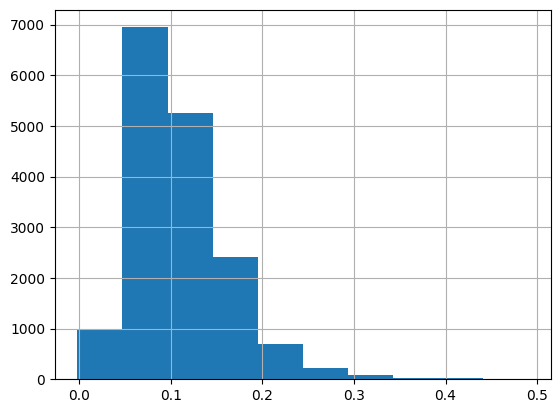

In [28]:
# y_test = predictor.predict(test_data, model = model_name)
y_test = predictor.predict(test_data)
perf = predictor.evaluate_predictions(y_true=test_data['y'], y_pred=y_test, auxiliary_metrics=True)
perf, y_test.hist()

AUC Score: 0.8192554736638616


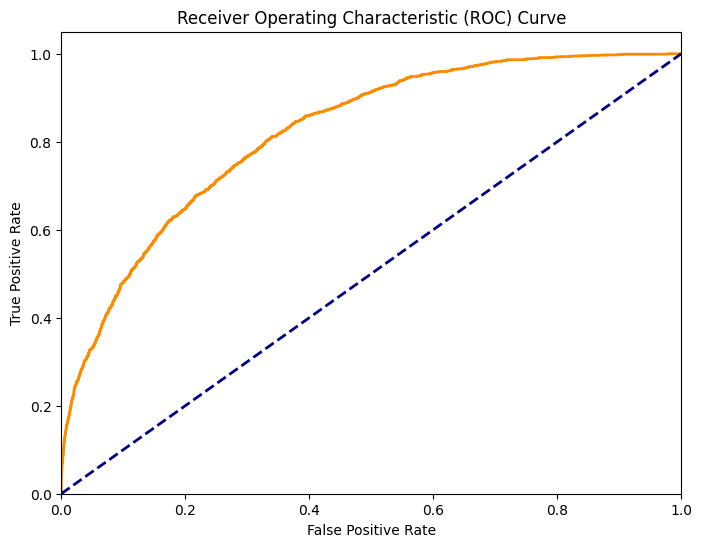

In [29]:
auc_score = roc_auc_score(test_data['y'], y_test)
print(f"AUC Score: {auc_score}")

fpr, tpr, thresholds = roc_curve(test_data['y'], y_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [51]:
def eval_auc(test_data):
    model_names = predictor.model_names()

    y_test = test_data['y']
    test_data_nolab = test_data.drop(columns=['y'])
    auc_roc_scores = {}
    for model_name in model_names:
        try:
            y_pred = predictor.predict(test_data_nolab, model=model_name)
        except Exception as e:
            print(f"Model {model_name} does not support predict method : {e}")
            continue
        auc_roc = roc_auc_score(y_test, y_pred)
        auc_roc_scores[model_name] = auc_roc
    
    top = pd.DataFrame.from_dict(auc_roc_scores, orient='index', columns=['AUC-ROC'])
    top = top.sort_values(by=['AUC-ROC'], ascending=False)
    return top

In [52]:
eval_auc(train_data)

Model LightGBMXT_BAG_L1 does not support predict method : 'NoneType' object has no attribute 'predict'
Model LightGBM_BAG_L1 does not support predict method : 'NoneType' object has no attribute 'predict'
Model CatBoost_BAG_L1 does not support predict method : 'NoneType' object has no attribute 'predict'
Model NeuralNetFastAI_BAG_L1 does not support predict method : 'NoneType' object has no attribute 'dls'
Model XGBoost_BAG_L1 does not support predict method : 'NoneType' object has no attribute 'set_params'
Model LightGBMLarge_BAG_L1 does not support predict method : 'NoneType' object has no attribute 'predict'
Model WeightedEnsemble_L2 does not support predict method : 'NoneType' object has no attribute 'predict'
Model LightGBMXT_BAG_L2 does not support predict method : 'NoneType' object has no attribute 'predict'
Model LightGBM_BAG_L2 does not support predict method : 'NoneType' object has no attribute 'predict'
Model RandomForestMSE_BAG_L2 does not support predict method : 'NoneType'

,AUC-ROC
ExtraTreesMSE_BAG_L1_FULL,0.999799
ExtraTreesMSE_BAG_L1,0.999799
RandomForestMSE_BAG_L1,0.998648
RandomForestMSE_BAG_L1_FULL,0.998648
ExtraTreesMSE_BAG_L2_FULL,0.942905
LightGBMLarge_BAG_L1_FULL,0.932226
RandomForestMSE_BAG_L2_FULL,0.889793
CatBoost_BAG_L2_FULL,0.847994
WeightedEnsemble_L2_FULL,0.835227
XGBoost_BAG_L1_FULL,0.829236


## For Binary

In [ ]:
# y_test = predictor.predict_proba(test_data, model = model_name)
y_test = predictor.predict_proba(test_data)
# y_test = predictor.predict_proba(test_data)
perf = predictor.evaluate_predictions(y_true=test_data['y'], y_pred=y_test, auxiliary_metrics=True)

In [ ]:
auc_score = roc_auc_score(test_data['y'], y_test[1])
print(f"AUC Score: {auc_score}")

fpr, tpr, thresholds = roc_curve(test_data['y'], y_test[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

## Feature

In [32]:
predictor.feature_importance(test_data)

Computing feature importance via permutation shuffling for 54 features using 5000 rows with 5 shuffle sets...
	101.23s	= Expected runtime (20.25s per shuffle set)
	48.57s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
Shop Name,0.005387,0.000601,1.833443e-05,5,0.006625,0.004149
Other installment purchase_balance,0.003075,0.000421,4.116348e-05,5,0.003942,0.002208
pms_i_ymd,0.002539,0.000190,3.734744e-06,5,0.002930,0.002148
Overdraft_balance,0.001851,0.000383,2.085454e-04,5,0.002640,0.001062
Province,0.001650,0.000154,9.046140e-06,5,0.001967,0.001332
Leasing enquiry_count,0.001541,0.000136,7.143200e-06,5,0.001821,0.001262
c_number_of_employee,0.001402,0.000073,9.008049e-07,5,0.001554,0.001251
c_number_of_working_year,0.001309,0.000314,3.662728e-04,5,0.001955,0.000664
r_generalcode4,0.001308,0.000092,2.856755e-06,5,0.001497,0.001120
place_for_sending_information,0.001242,0.000147,2.319846e-05,5,0.001545,0.000939


# Submit

<Axes: >

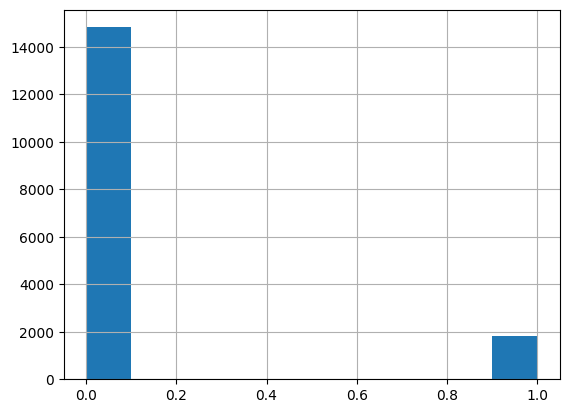

In [41]:
train_data['y'].hist()

<Axes: >

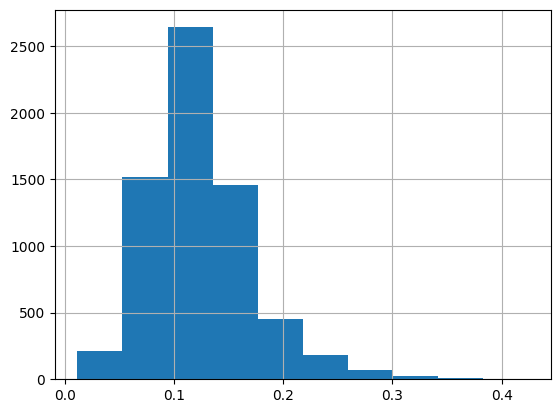

In [56]:
# pred = predictor.predict_proba(test) #, model=model_nam)
# pred = pred[1]
# model_name = "RandomForestMSE_BAG_L2_FULL"
model_name = "ExtraTreesMSE_BAG_L1_FULL"
pred = predictor.predict(test, model=model_name)
# pred = predictor.predict(test)
pred.hist()

<Axes: >

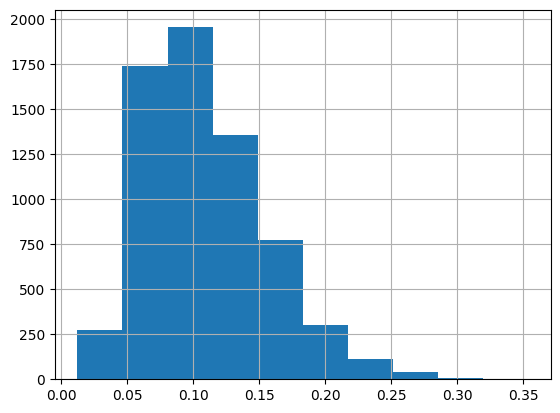

In [55]:
# pred = predictor.predict_proba(test) #, model=model_nam)
# pred = pred[1]
# model_name = "RandomForestMSE_BAG_L2_FULL"
# model_name = "ExtraTreesMSE_BAG_L1_FULL"
# pred = predictor.predict(test, model=model_name)
pred = predictor.predict(test)
pred.hist()

In [57]:
sub = pd.read_csv(data_root + 'submission_template_for_public.csv')
# sub = sub[['no']]
sub

,ID,default_12month
0,2.024120e+11,0
1,2.024120e+11,0
2,2.024120e+11,0
3,2.024120e+11,0
4,2.024120e+11,0
...,...,...
6562,2.024120e+11,0
6563,2.024120e+11,0
6564,2.024120e+11,0
6565,2.024120e+11,0


In [58]:
sub['default_12month'] = pred
sub

,ID,default_12month
0,2.024120e+11,0.101403
1,2.024120e+11,0.120883
2,2.024120e+11,0.105770
3,2.024120e+11,0.149847
4,2.024120e+11,0.101118
...,...,...
6562,2.024120e+11,0.119572
6563,2.024120e+11,0.143768
6564,2.024120e+11,0.240502
6565,2.024120e+11,0.183191


In [59]:
sub.to_csv(f'99_{model_name}.csv', index=False)
# sub.to_csv(".csv", index=False)

In [ ]:
eval_auc(train_data)

In [ ]:
import os

In [ ]:
model_names = predictor.model_names()

save_path = 'submission/'
os.makedirs(save_path, exist_ok=True)

for model_name in model_names:
    try:
        pred = predictor.predict(test, model=model_name)
    except:
        print(f"Model {model_name} does not support predict method")
        continue
    # Compute AUC-ROC
    
    sub['default_12month'] = pred
    sub.to_csv(f'{save_path}99_{model_name}.csv', index=False)